In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, GlobalAveragePooling1D

In [12]:
num_words=10000
(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

max_len = 200
x_train = pad_sequences(x_train,maxlen=max_len)
x_test = pad_sequences(x_test,maxlen=max_len)

In [13]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=num_words,output_dim=32),
    GlobalAveragePooling1D(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5956 - loss: 0.6879 - val_accuracy: 0.7153 - val_loss: 0.6476
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7438 - loss: 0.6126 - val_accuracy: 0.8073 - val_loss: 0.4949
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8320 - loss: 0.4477 - val_accuracy: 0.8467 - val_loss: 0.3823
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8633 - loss: 0.3469 - val_accuracy: 0.8611 - val_loss: 0.3365
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8842 - loss: 0.2970 - val_accuracy: 0.8681 - val_loss: 0.3135
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9013 - loss: 0.2607 - val_accuracy: 0.8633 - val_loss: 0.3139
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9020 - loss: 0.2488 - val_accuracy: 0.8754 - val_loss: 0.2955
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9164 - loss: 0.2241 - val_accuracy: 0.8800 - v

In [15]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8737 - loss: 0.3036
Test Loss: 0.30
Test Accuracy: 0.87


In [16]:
pred_probs = model.predict(x_test)
predictions = (pred_probs>0.5).astype("int32")

for i in range(10):
    print(f"Review {i+1}: Predicted: {predictions[i][0]} Actual: {y_test[i]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step
Review 1: Predicted: 0 Actual: 0
Review 2: Predicted: 1 Actual: 1
Review 3: Predicted: 1 Actual: 1
Review 4: Predicted: 1 Actual: 0
Review 5: Predicted: 1 Actual: 1
Review 6: Predicted: 1 Actual: 1
Review 7: Predicted: 1 Actual: 1
Review 8: Predicted: 0 Actual: 0
Review 9: Predicted: 1 Actual: 0
Review 10: Predicted: 1 Actual: 1


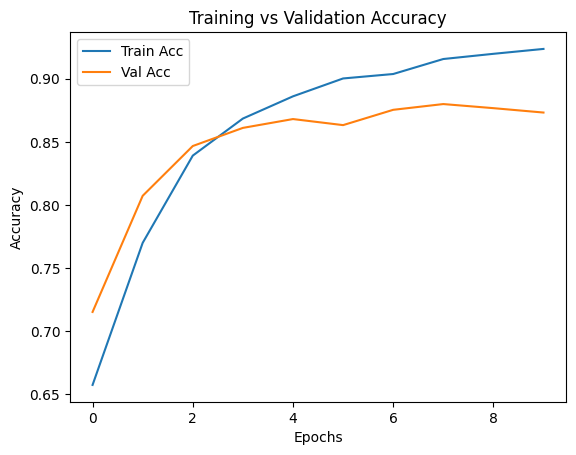

In [18]:
plt.plot(history.history['accuracy'],label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()